In [1]:
# import necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# function of ODEs
def f(y,t,k1,k2,k3):
    A, B, C = y
    dAdt = -(k1+k2)*A+k3*(B+C)
    dBdt = -(k1+k3)*B+k2*(A+C)
    dCdt = -(k2+k3)*C+k1*(A+B)
    return [dAdt, dBdt, dCdt]

In [3]:
# generate the range of time
t = np.linspace(0,5)
# generate the values of parameters
k1 = 1
k2 = 1
k3 = 1

In [4]:
# function to compute the solution
def solution(f, args=(), sets = [[1,0,0],[1,1,0],[1,1,1],[100,50,20]]):
    sol = []
    sol.append(odeint(f,sets[0],t,args=args))
    sol.append(odeint(f,sets[1],t,args=args))
    sol.append(odeint(f,sets[2],t,args=args))
    sol.append(odeint(f,sets[3],t,args=args))
    return sol

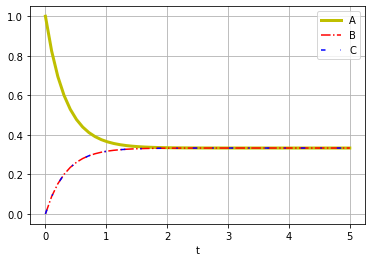

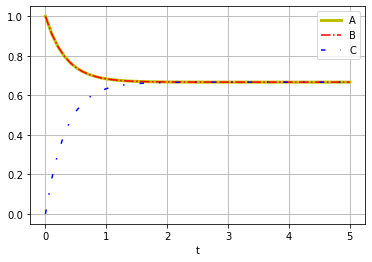

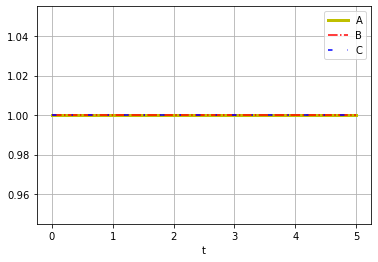

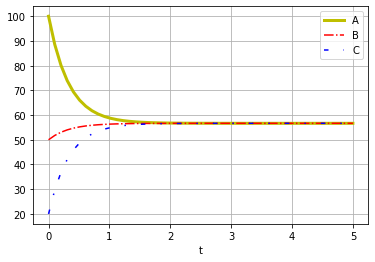

In [5]:
# get the solution and plot them separately
sol = solution(f, args=(k1,k2,k3))
for i in range(len(sol)):
    plt.plot(t, sol[i][:, 0], c='y', label='A',linewidth=3)
    plt.plot(t, sol[i][:, 1],'-.', c='r', label='B')
    plt.plot(t, sol[i][:, 2],linestyle = (0, (3, 10, 1, 10)), c='b', label='C')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

In [6]:
# see the results of each solution
for i in range(4):
    print(sol[i][-1])

[0.33333354 0.33333323 0.33333323]
[0.66666677 0.66666677 0.66666646]
[1. 1. 1.]
[56.66667994 56.66666462 56.66665544]


In [7]:
# function of second version of ODEs
def f2(y,t):
    A, B, C = y
    N = A+B+C
    dAdt = -(min(A,B)+min(A,C))*A/N+min(B,C)*(B+C)/N
    dBdt = -(min(A,B)+min(B,C))*B/N+min(A,C)*(A+C)/N
    dCdt = -(min(A,C)+min(B,C))*C/N+min(A,B)*(A+B)/N
    return [dAdt, dBdt, dCdt]

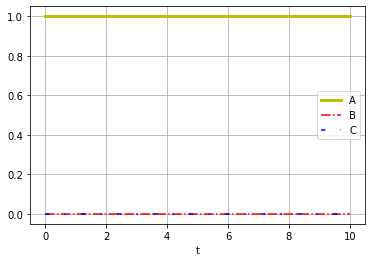

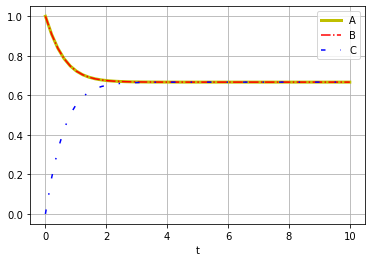

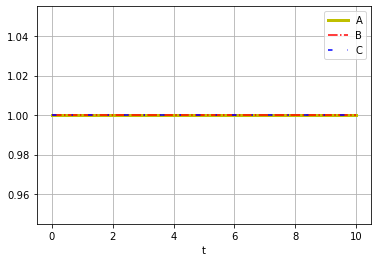

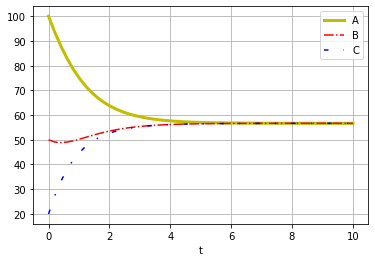

In [8]:
# generate the range of time
t = np.linspace(0,10)
# get the solution and plot them separately
sol2 = solution(f2)
for i in range(len(sol)):
    plt.plot(t, sol2[i][:, 0], c='y', label='A',linewidth=3)
    plt.plot(t, sol2[i][:, 1],'-.', c='r', label='B')
    plt.plot(t, sol2[i][:, 2],linestyle = (0, (3, 10, 1, 10)), c='b', label='C')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.savefig('f2{}'.format(i))
    plt.show()

In [9]:
# function of experimental model
def process(initial, N=1e3):
    a0 = initial[0]
    b0 = initial[1]
    c0 = initial[2]
    total = a0+b0+c0
    n = 0
    a = [a0]
    b = [b0]
    c = [c0]
    while n<N:
        # choose two number with given possibilities
        idx = set(np.random.choice(3, size=2, p=(a0/total,b0/total,c0/total)))
        # different cases for changing number of particles
        if idx == set([0,1]):
            a0 -= 1
            b0 -= 1
            c0 += 2
        if idx == set([0,2]):
            a0 -= 1
            b0 += 2
            c0 -= 1
        if idx == set([1,2]):
            a0 += 2
            b0 -= 1
            c0 -= 1
        n += 1
        a.append(a0)
        b.append(b0)
        c.append(c0)
        if a0+b0+c0 == (a0 or b0 or c0):
            return [a,b,c],n
    return [a,b,c],n

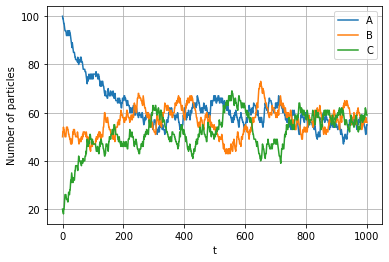

In [10]:
# get the solution from experimental model
[a,b,c],n = process([100,50,20])
# plot the solution
num = np.arange(n+1)
plt.plot(num,a, label='A')
plt.plot(num,b, label='B')
plt.plot(num,c, label='C')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('Number of particles')
plt.savefig('experiment.jpg')
plt.show()

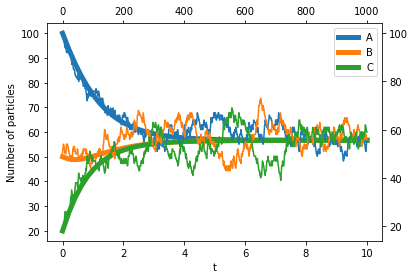

In [11]:
# plot discrete and continuous solutions together
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)

ax.plot(t, sol2[3][:,0], label='A', linewidth=5)
ax.plot(t, sol2[3][:,1], label='B', linewidth=5)
ax.plot(t, sol2[3][:,2], label='C', linewidth=5)
ax.set_xlabel('t')
ax.set_ylabel('Number of particles')
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.legend()

ax2.plot(num, a)
ax2.plot(num, b)
ax2.plot(num, c)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()        
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')

ax3.set_xticks([])
ax3.set_yticks([])
plt.savefig('total.jpg')
plt.show()